# **Task 01:**
## **IRIS FLOWER CLASSIFICATION**
- The Iris flower dataset encompasses three distinct species: setosa, versicolor, and
virginica.
- These species are discernible through specific measurements. Imagine possessing
measurements of Iris flowers categorized by their distinct species.
- The goal is to train a machine learning model capable of learning from these
measurements and proficiently categorizing Iris flowers into their corresponding
species.
- Employ the Iris dataset to construct a model adept at classifying Iris flowers into
distinct species based on their sepal and petal measurements.
- This dataset serves as a prevalent choice for initial classification tasks, making it
ideal for introductory learning experiences.

![Iris Flower Classification.jpg](<attachment:Iris Flower Classification.jpg>)
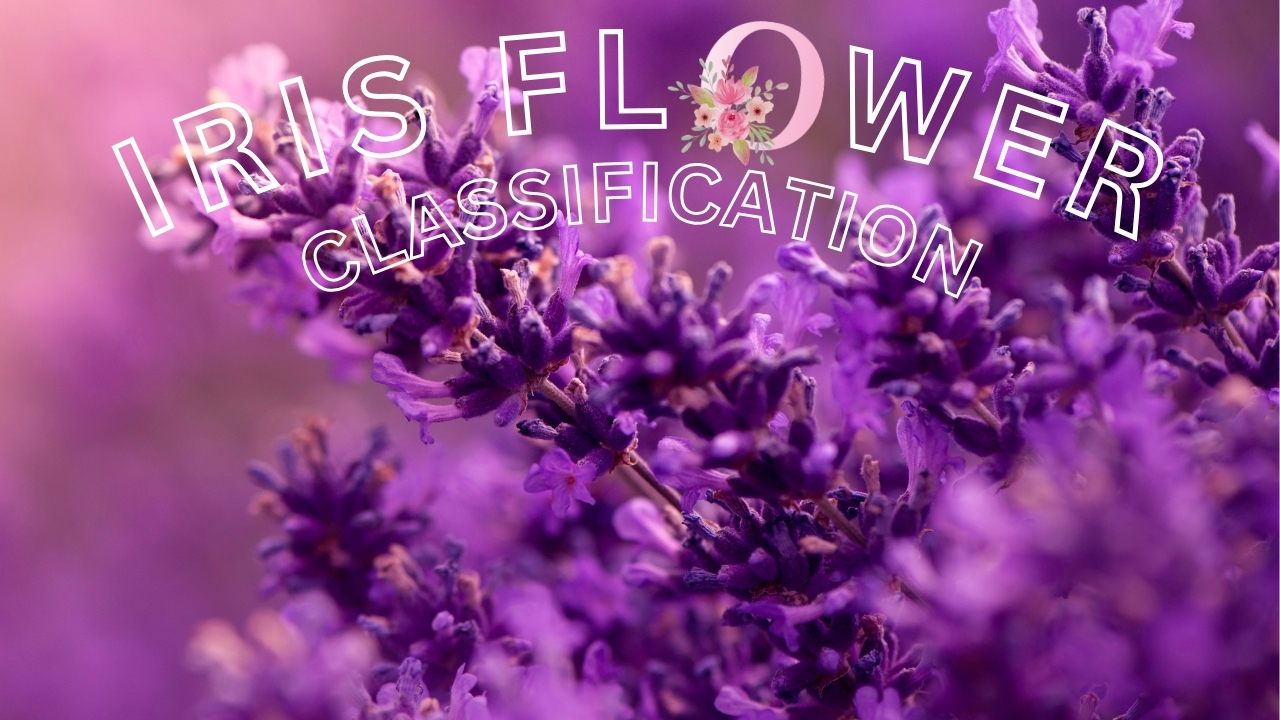

# 1.0 About Author
- Author: Mehak Iftikhar
- Project: Iris Flower Dataset
## Contact Info:
Click on link below to contact/follow/correct me:

- [LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)
- [Facebook](https://www.facebook.com/profile.php?id=61552023122774)
- [Twitter](https://twitter.com/mehakkhan874)
- [Kaggle](https://www.kaggle.com/mehakiftikhar)
- [Medium](https://medium.com/@mehakkhan301007)
- [Github](https://github.com/mehakiftikhar)

# 2.0 About Data
- Title: Iris Flower Dataset 
- Dataset: [link](https://www.kaggle.com/datasets/arshid/iris-flower-dataset)

  ## Metadata
  **`License:`** CC0: Public Domain

### 2.1 Task:
 Exploring the Iris Flower Dataset involves a step-by-step process. First, we clean and prepare the data to ensure it's accurate and consistent. Then, we summarize the data using descriptive statistics like averages and ranges. Next, we visualize the data with charts and graphs to see patterns and relationships. We detect outliers, which are unusual data points, and test our assumptions about the data. After pre-processing, we train a machine learning model and then call, train, and predict the model. 

### 2.3 Kernel Version Used:
- Python 3.11.5

# ***3.0 Data Preparation:***

## 3.1 Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## 3.2 Data Loading and Exploration | Cleaning

### Load the Dataset

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('..\Dataset\iris.csv')

### Set the option to show maximum columns:

In [3]:
pd.set_option('display.max_columns', None)

### Get a sneak peek of data:
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest.

In [4]:
# print the first 5 rows of the dataframe
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the Data

In [5]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Let's have a look on the shape of the dataset:

In [6]:
# data shpae
df.shape

(150, 5)

### Lets see the column name:

In [7]:
# Lets see the column name
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Observation Set 1:
- There are 150 rows and 5 columns in the dataset.
- The columns are of different data types. 
-  The columns in the datasets are:
   - 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'

### Descriptive Statistics:
Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [8]:
# Summary Statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Observation Set 2:
- There are 4 numeric as per Python coding or descriptive statistics from Python describe function.
- The minimum value of sepal_length column is 4.3 and the maximum value sepal_length column is 7.9. The mean and standard deviation of the sepal_length column are 5.84 and 0.83.
- The minimum value of sepal_width column is 2.0 and the maximum value sepal_width column is 4.4. The mean and standard deviation of the sepal_width column are 3.05 and 0.43.
- The minimum value of petal_length column is 1.0 and the maximum value petal_length column is 6.9. The mean and standard deviation of the petal_length column are 3.76 and 1.76.
- The minimum value of petal_width column is 0.1 and the maximum value petal_width column is 2.5. The mean and standard deviation of the petal_width column are 1.199 and 0.76.

## ***Let's check all columns one-by-one:***


#### *Lets deal with sepal_length column:*

<Axes: xlabel='sepal_length', ylabel='Count'>

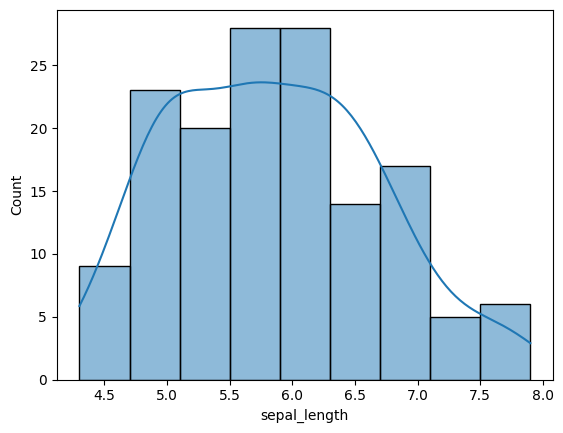

In [9]:
# draw a histogram to see the distribution of sepal_length column
sns.histplot(df['sepal_length'], kde=True)

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


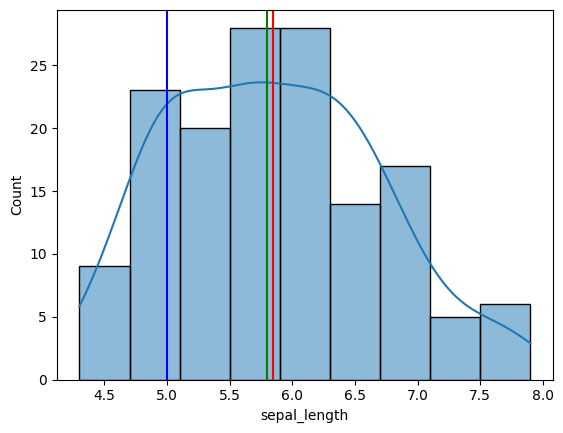

In [10]:
# plot the mean, median and mode of sepal_length column using sns
sns.histplot(df['sepal_length'], kde=True)
plt.axvline(df['sepal_length'].mean(), color='red')
plt.axvline(df['sepal_length'].median(), color='green')
plt.axvline(df['sepal_length'].mode()[0], color='blue')

# print the value of mean, median and mode of sepal_length column
print('Mean:', df['sepal_length'].mean())
print('Median:', df['sepal_length'].median())
print('Mode:', df['sepal_length'].mode()[0])

In [11]:
# plot the histogram of sepal_length column using plotly and coloring this by species

fig = px.histogram(data_frame=df, x='sepal_length', color='species')
fig.show()

#### *Lets deal with sepal_width column:*

<Axes: xlabel='sepal_width', ylabel='Count'>

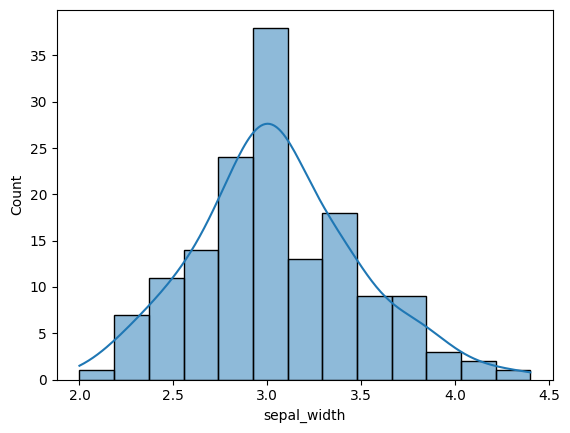

In [12]:
# draw a histogram to see the distribution of sepal_width column
sns.histplot(df['sepal_width'], kde=True)

Mean: 3.0540000000000003
Median: 3.0
Mode: 3.0


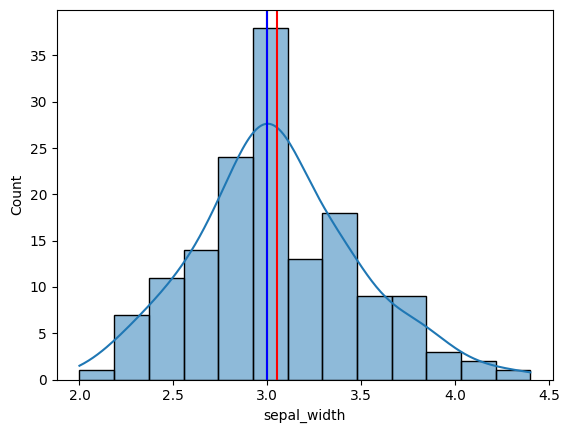

In [13]:
# plot the mean, median and mode of sepal_width column using sns
sns.histplot(df['sepal_width'], kde=True)
plt.axvline(df['sepal_width'].mean(), color='red')
plt.axvline(df['sepal_width'].median(), color='green')
plt.axvline(df['sepal_width'].mode()[0], color='blue')

# print the value of mean, median and mode of sepal_width column
print('Mean:', df['sepal_width'].mean())
print('Median:', df['sepal_width'].median())
print('Mode:', df['sepal_width'].mode()[0])

In [14]:
# plot the histogram of sepal_width column using plotly and coloring this by species

fig = px.histogram(data_frame=df, x='sepal_width', color='species')
fig.show()

#### *Lets deal with petal_length column:*

In [15]:
# Encode the object column
le_species = LabelEncoder()
df['species'] = le_species.fit_transform(df['species'])


In [16]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [17]:
# decode the object column
df['species'] = le_species.inverse_transform(df['species'])

<Axes: xlabel='petal_length', ylabel='Count'>

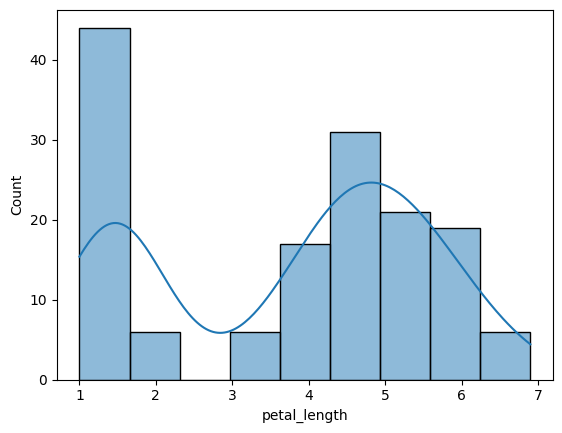

In [18]:
# draw a histogram to see the distribution of petal_length column
sns.histplot(df['petal_length'], kde=True)

Mean: 3.758666666666666
Median: 4.35
Mode: 1.5


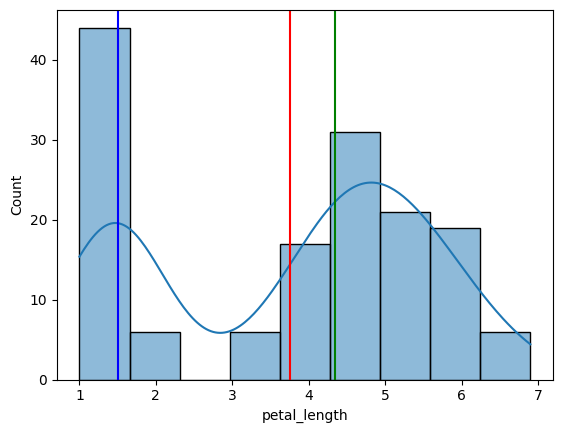

In [19]:
# plot the mean, median and mode of petal_length column using sns
sns.histplot(df['petal_length'], kde=True)
plt.axvline(df['petal_length'].mean(), color='red')
plt.axvline(df['petal_length'].median(), color='green')
plt.axvline(df['petal_length'].mode()[0], color='blue')

# print the value of mean, median and mode of petal_length column
print('Mean:', df['petal_length'].mean())
print('Median:', df['petal_length'].median())
print('Mode:', df['petal_length'].mode()[0])

In [20]:
# plot the histogram of petal_length column using plotly and coloring this by species

fig = px.histogram(data_frame=df, x='petal_length', color='species')
fig.show()

#### *Lets deal with petal_width column:*

<Axes: xlabel='petal_width', ylabel='Count'>

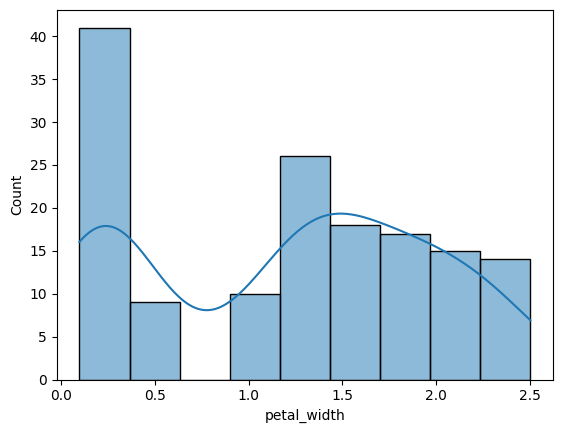

In [21]:
# draw a histogram to see the distribution of petal_width column
sns.histplot(df['petal_width'], kde=True)

Mean: 1.1986666666666668
Median: 1.3
Mode: 0.2


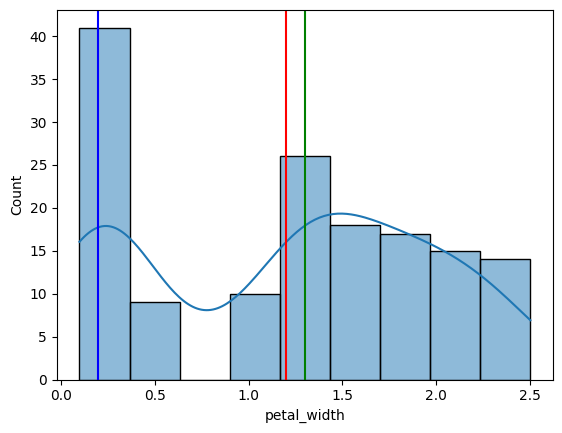

In [22]:
# plot the mean, median and mode of petal_width column using sns
sns.histplot(df['petal_width'], kde=True)
plt.axvline(df['petal_width'].mean(), color='red')
plt.axvline(df['petal_width'].median(), color='green')
plt.axvline(df['petal_width'].mode()[0], color='blue')

# print the value of mean, median and mode of petal_width column
print('Mean:', df['petal_width'].mean())
print('Median:', df['petal_width'].median())
print('Mode:', df['petal_width'].mode()[0])

In [23]:
# plot the histogram of petal_width column using plotly and coloring this by species

fig = px.histogram(data_frame=df, x='petal_width', color='species')
fig.show()

#### *Lets deal with species column:*

In [24]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [39]:
df['species'].nunique()

3

In [25]:
# value count of species column
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Observation Set 3:
- The data types of all columns are floats, except species column. The data types of species column is object.
- The mean, median and mode of sepal_length column is 5.84, 5.8 and 5.0.
- The mean, median and mode of sepal_width column is 3.05, 3.0 and 3.0.
- The mean, median and mode of petal_length column is 3.76, 4.35 and 1.5.
- The mean, median and mode of petal_width column is 1.199, 1.3 and 0.2.
- There are three unique values in the species column, which are as follows:
    - Iris-setosa
    - Iris-versicolor
    - Iris-virginica
---

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values</span>

Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

In [26]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Milestone 1: There are no missing values in the dataset.
---

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers</span>

In [28]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

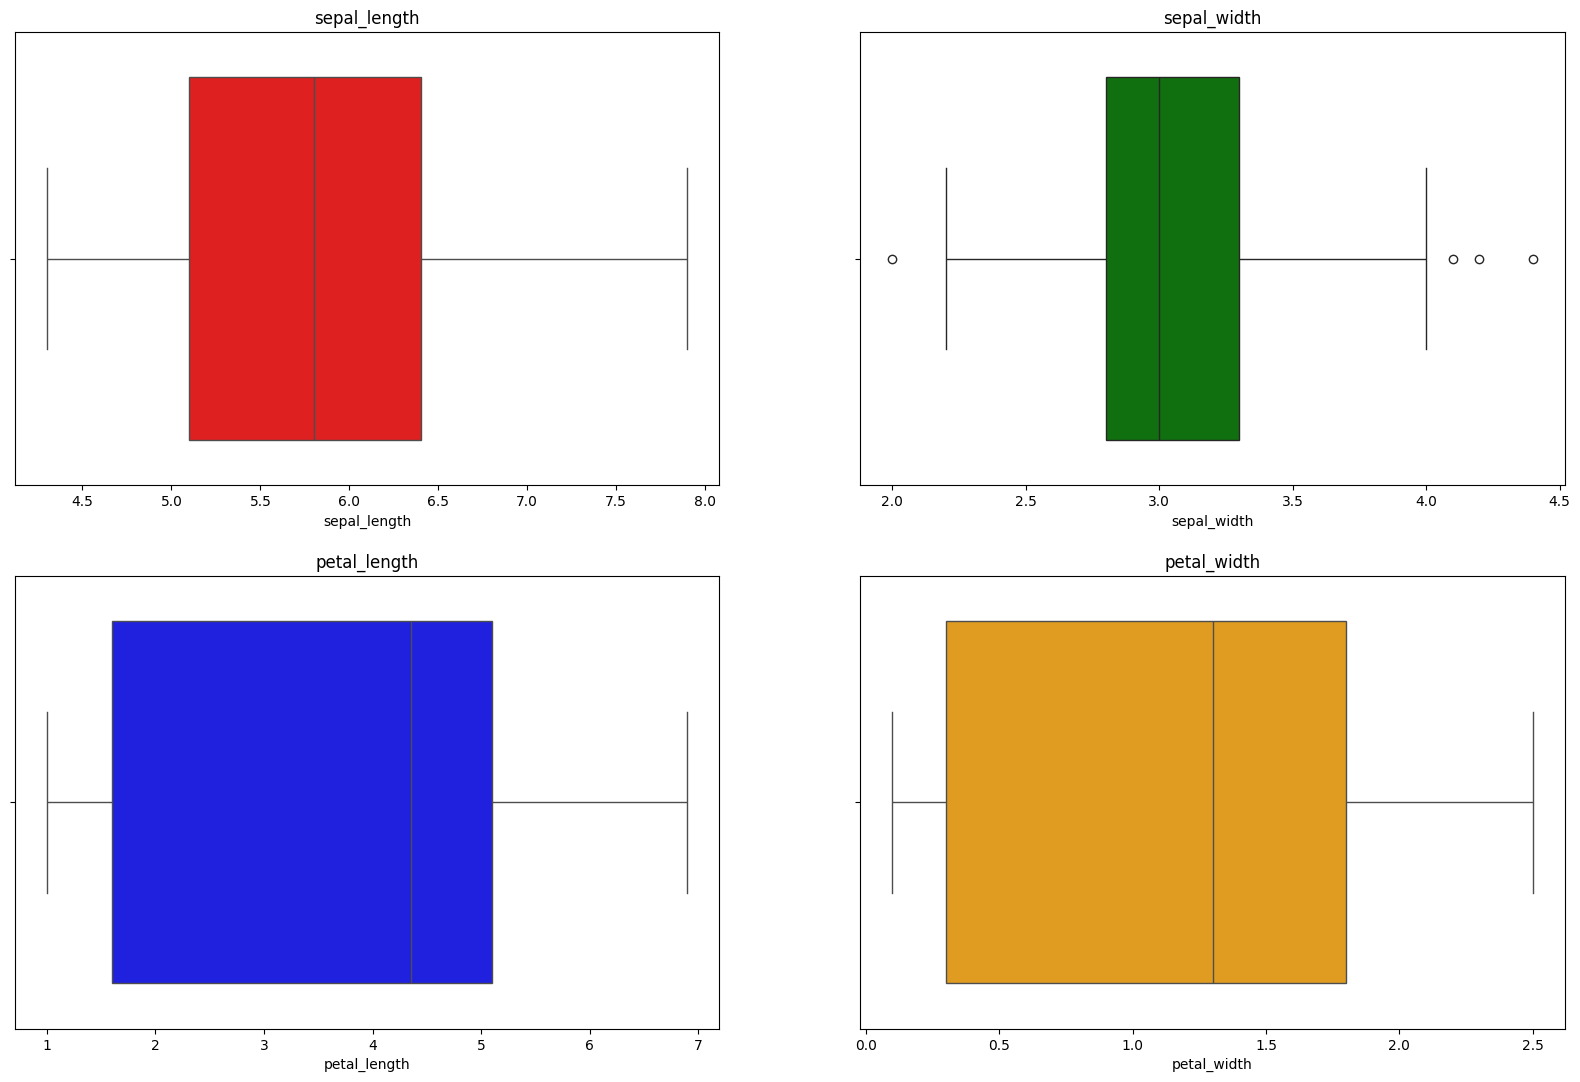

In [29]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [30]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='sepal_length')
fig.show()

fig = px.box(data_frame=df, y='sepal_width')
fig.show()

fig = px.box(data_frame=df, y='petal_length')
fig.show()

fig = px.box(data_frame=df, y='petal_width')
fig.show()


In [31]:
# Calculate the IQR
q1 = df['sepal_width'].quantile(0.25)
q3 = df['sepal_width'].quantile(0.75)
iqr = q3 - q1

# Calculate the LOF and UFO
lof = q1 - 1.5 * iqr
ufo = q3 + 1.5 * iqr
print(lof)
print(ufo)
# Identify the outliers
outliers1 = df[df['sepal_width'] < lof]
outliers2 = df[df['sepal_width'] > ufo]

# Combine the outliers using concat
outliers = pd.concat([outliers1, outliers2])

# Print the outliers
print(outliers)

2.05
4.05
    sepal_length  sepal_width  petal_length  petal_width          species
60           5.0          2.0           3.5          1.0  Iris-versicolor
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

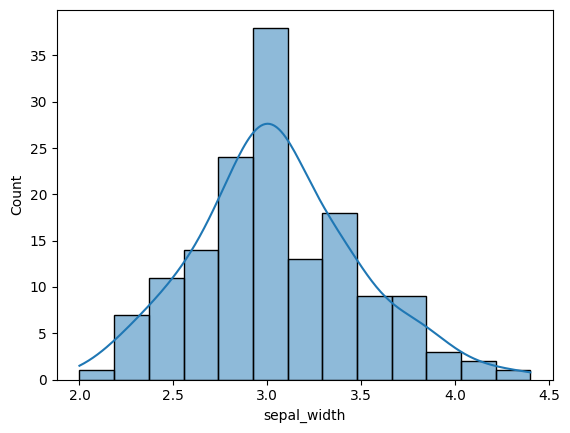

In [34]:
sns.histplot(df['sepal_width'], kde=True)

## Milestone 2: I checked the outliers of the sepal_width column and found four outliers in this column, but the outliers of this column are good for the model (this is what i think) because the accuracy of the model is very good with outliers.

---

# ***4.0 Model Selection and Evaluation:***

<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning</span>

#### Lets make X and y in our Data:

In [35]:
X = df.drop('species', axis=1)
y = df['species']

#### Train_test_split the Data:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Call, Train and Predict the Model:

In [37]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [38]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)

best_model = pipeline
    
# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9416666666666667
Test Accuracy: 1.0


### Observation Set 4:
- I chose a Random Forest model.
- The test accuracy is 1.0, and the cross-validation accuracy is 0.94.
---

# Contact Details:
Click on link below to contact/follow/correct me:\

[LinkedIn](https://www.linkedin.com/in/mehak-iftikhar/)\
[Facebook](https://www.facebook.com/profile.php?id=61552023122774)\
[Twitter](https://twitter.com/mehakkhan874)\
[Kaggle](https://www.kaggle.com/mehakiftikhar)\
[Medium](https://medium.com/@mehakkhan301007)\
[Github](https://github.com/mehakiftikhar)

---